In [1]:
# So in this project I'll train a model to detect pneumonia in X-ray images

In [2]:
import os
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
import random

C:\Users\Utilizador\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [28]:
## Setting up the directories
train_dir = '/chest_xray/train/'
test_dir = '/chest_xray/test/'
validation_dir = '/chest_xray/val/'

In [89]:
## Setting up the paths for directories
train_pneu=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train\PNEUMONIA'
train_norm=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train\NORMAL'
test_pneu=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\test\PNEUMONIA'
test_norm=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\test\NORMAL'
val_pneu=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\val\PNEUMONIA'
val_norm=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\val\NORMAL'

In [118]:
path_list = [val_pneu, val_norm]

In [119]:
def get_images_array (path_list):
    img_dict={}
    for path in path_list:
        name='_'.join(path.replace('\\', ' ').split()[-2:])
        lista_img=[]
        for image in os.listdir(path):
            img = mpimg.imread(path + "\\" + image)
            lista_img.append(img)
        img_dict[name]=lista_img
    return img_dict

In [120]:
get_images_array(path_list)

{'val_PNEUMONIA': [array([[15, 15, 16, ...,  9,  8,  8],
         [15, 15, 16, ..., 12, 12, 13],
         [15, 15, 16, ..., 17, 17, 18],
         ...,
         [ 0,  0, 10, ...,  0,  8,  0],
         [18,  8,  0, ...,  0,  0, 17],
         [ 4, 10, 20, ..., 13,  8,  0]], dtype=uint8),
  array([[2, 2, 2, ..., 9, 6, 2],
         [2, 2, 2, ..., 9, 5, 2],
         [2, 2, 2, ..., 8, 5, 2],
         ...,
         [7, 7, 7, ..., 8, 8, 8],
         [7, 7, 7, ..., 8, 8, 8],
         [7, 7, 7, ..., 8, 8, 8]], dtype=uint8),
  array([[8, 8, 8, ..., 0, 0, 0],
         [8, 8, 8, ..., 0, 0, 0],
         [8, 8, 8, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[  0,   0,   0, ..., 134, 135, 131],
         [  0,   0,   0, ..., 132, 134, 131],
         [  0,   0,   0, ..., 130, 133, 133],
         ...,
         [  2,   2,   2, ...,   2,   2,   2],
         [  2,   2,   2, ...,   2,   2,   2],
    

In [121]:
path_list

['C:\\Users\\Utilizador\\Desktop\\Projectos Data Sciene\\Ironhack\\Final_Project_3\\chest_xray\\val\\PNEUMONIA',
 'C:\\Users\\Utilizador\\Desktop\\Projectos Data Sciene\\Ironhack\\Final_Project_3\\chest_xray\\val\\NORMAL']

In [ ]:
path_train='C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train'
path_val=

## Tutorial - https://python.plainenglish.io/deep-learning-in-medicine-identifying-pneumonia-from-a-chest-x-ray-6d1aabe68b01

In [131]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data = image_dataset_from_directory(
    directory=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))
test_data = image_dataset_from_directory(
    directory=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

val_data = image_dataset_from_directory(
    directory=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\val',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

#model = keras.applications.Xception(weights=None, input_shape=(256, 256, 3), classes=2)
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
#model.fit(train_ds, epochs=2, validation_data=validation_ds)

Found 4343 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [139]:
## Setting up the data
## Set the image size
IMG_SIZE = (224, 224)

print("Training Images:")
train_data=tf.keras.preprocessing.image_dataset_from_directory(
directory = r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train',
image_size = IMG_SIZE,
label_mode = "binary",
color_mode = "grayscale",
batch_size = 32)

print("Testing Images:")
test_data=tf.keras.preprocessing.image_dataset_from_directory(
directory = r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\test',
image_size = IMG_SIZE,
label_mode = "binary",
color_mode = "grayscale",
batch_size = 32)

print("Validation Images:")
val_data=tf.keras.preprocessing.image_dataset_from_directory(
directory = r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\val',
image_size = IMG_SIZE,
label_mode = "binary",
color_mode = "grayscale",
batch_size = 32)

Training Images:
Found 4343 files belonging to 2 classes.
Testing Images:
Found 624 files belonging to 2 classes.
Validation Images:
Found 16 files belonging to 2 classes.


In [140]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
preprocessing.RandomFlip("horizontal"),
preprocessing.RandomRotation(0.2),
preprocessing.RandomZoom(0.2),
preprocessing.RandomHeight(0.2),
preprocessing.RandomWidth(0.2),
##preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

In [141]:
## Using the model EfficientNetB1 for the first experiment with all the layers trainable
base_model = tf.keras.applications.EfficientNetB1(include_top = False)
base_model.trainable = True

In [142]:
## Creating the model 
inputs = tf.keras.layers.Input(shape = (224, 224, 1), name = "Input_Layer")
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = data_augmentation(inputs)
x = tf.keras.layers.Conv2D(3,(3,3),padding='same')(x)
x = base_model(x)
x = tf.keras.layers.GlobalMaxPooling2D(name = "global_max")(x)
outputs = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
model_0 = tf.keras.Model(inputs, outputs)
## Compiling the model
model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [143]:
## Setting up callbacks
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                patience=3) # if val loss decreases for 3 epochs in a row, stop training
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.25, # multiply the learning rate by 0.2 (reduce by 4x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

In [144]:
history_0 = model_0.fit(train_data,
                        epochs = 100,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = int(0.25*len(test_data)),
                        callbacks = [early_stopping, reduce_lr])

Epoch 1/100
 71/136 [==============>...............] - ETA: 15:02 - loss: 0.4458 - accuracy: 0.8402

InvalidArgumentError: Graph execution error:

Input is empty.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_76363]

## Tutorial https://www.kaggle.com/faressayah/chest-x-ray-medical-diagnosis-with-deep-learning

In [3]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [4]:
## Setting up the paths for directories
train_pneu=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train\PNEUMONIA'
train_norm=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train\NORMAL'
test_pneu=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\test\PNEUMONIA'
test_norm=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\test\NORMAL'
val_pneu=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\val\PNEUMONIA'
val_norm=r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\val\NORMAL'

Train set:
PNEUMONIA=3001
NORMAL=1341
Test set:
PNEUMONIA = 390
NORMAL = 234
Validation set:
PNEUMONIA = 8
NORMAL = 8


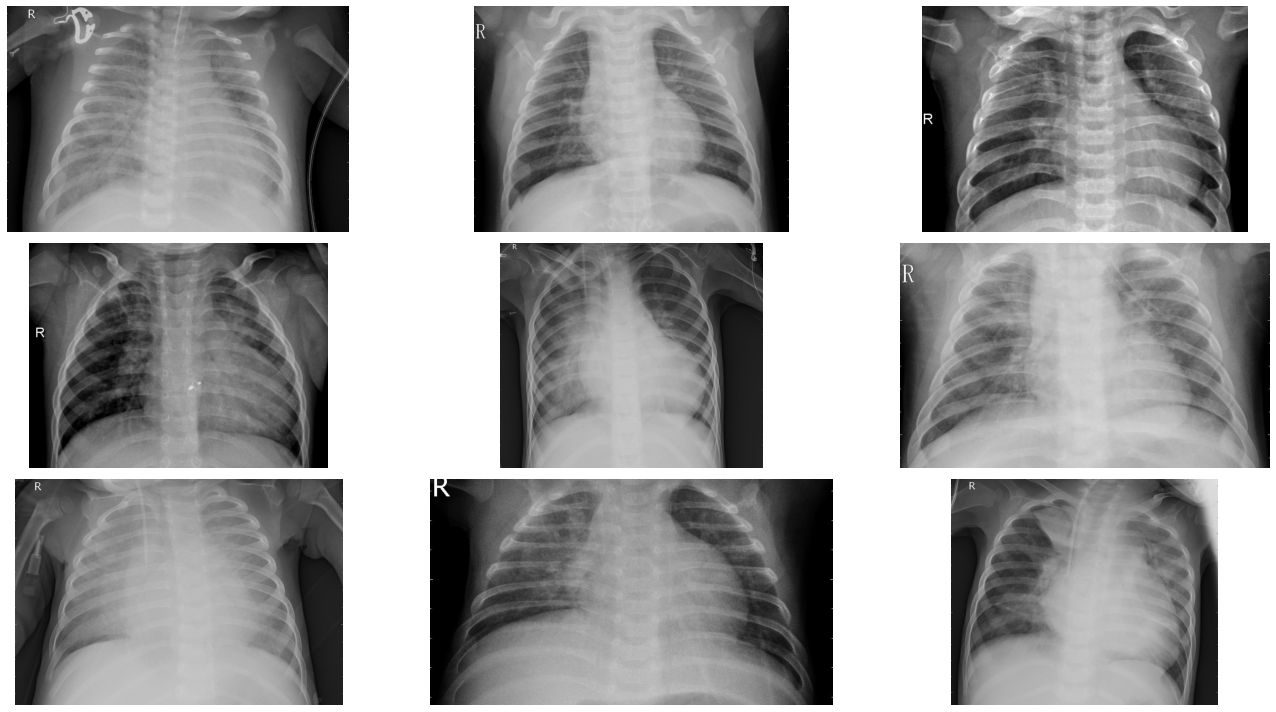

In [5]:
train_dir = r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train'
test_dir = r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\test'
val_dir = r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\val'

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

# Display x-ray images with pneumonia from train set
pneumonia = os.listdir(r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train\PNEUMONIA')
pneumonia_dir = r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train\PNEUMONIA'

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

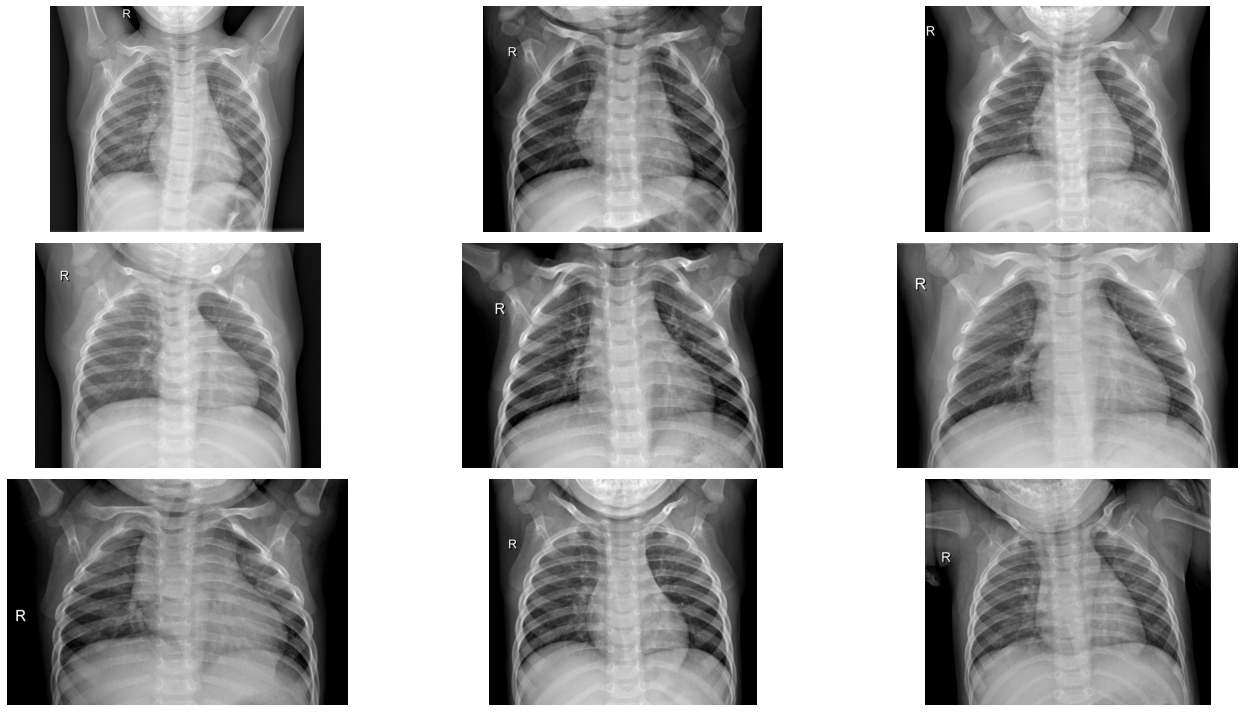

In [6]:
# Display x-ray images without pneumonia from train set
normal = os.listdir(r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train\NORMAL')
normal_dir = r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train\NORMAL'

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

In [41]:
class_names = train.classes
print(class_names)

[0 0 0 ... 1 1 1]


In [7]:
from keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [8]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(320, 320))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(320, 320))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(320, 320))

Found 4342 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height, one single color channel.
The maximum pixel value is 2.5428 and the minimum is -3.0220
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


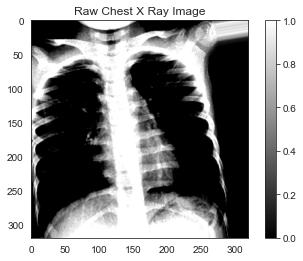

In [9]:
import seaborn as sns
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

C:\Users\Utilizador\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

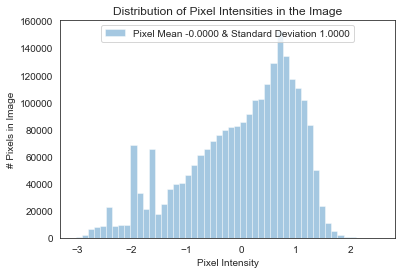

In [10]:
import numpy as np
sns.distplot(generated_image.ravel(),
             label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", 
             kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [11]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.69
Weight for class 1: 0.31


In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import (
    Dense, Conv2D, MaxPool2D, Dropout, Flatten, 
    BatchNormalization, GlobalAveragePooling2D
)

from keras.applications.densenet import DenseNet121
from keras import backend as K

from sklearn.metrics import confusion_matrix, classification_report

In [13]:
base_model = DenseNet121(input_shape=(320, 320, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 326, 326, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 160, 160, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [14]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The model has 428 layers
The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 320, 320, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [35]:
# model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

r = model.fit(
    train, 
    epochs=4,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

pickle.dump(model, open('2_model.p', 'wb'))

Epoch 1/4
100/100 [==============================] - 1519s 15s/step - loss: 0.1760 - accuracy: 0.8250 - val_loss: 1.6134 - val_accuracy: 0.5000
Epoch 2/4
100/100 [==============================] - 1528s 15s/step - loss: 0.1152 - accuracy: 0.8963
Epoch 3/4
100/100 [==============================] - 1529s 15s/step - loss: 0.1246 - accuracy: 0.8697
Epoch 4/4
100/100 [==============================] - 1533s 15s/step - loss: 0.0876 - accuracy: 0.9125
INFO:tensorflow:Assets written to: ram://f799c1de-3f7e-49ec-8d23-4837fad2db4d/assets


In [49]:
model.save('model_f')

INFO:tensorflow:Assets written to: model_f\assets


In [36]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 312s 499ms/step - loss: 1.6448 - accuracy: 0.6987
Test Accuracy: 69.87%
543/543 [==============================] - 2319s 4s/step - loss: 2.3206 - accuracy: 0.6255
Train Accuracy: 62.55%


In [24]:
len(validation)

16

In [46]:
#sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
class_names=['NORMAL','PNEUMONIA']
#class_names=[0,1]
img_path='person1_bacteria_1.jpeg'

#img_path=validation[0]
img_height=320
img_width=320

img = tf.keras.utils.load_img(
    path=img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to NORMAL with a 100.00 percent confidence.


In [48]:
max(tf.nn.softmax(predictions[0]))


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

## Tutorial - https://www.tensorflow.org/tutorials/images/classification

In [166]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [104]:
'_'.join(target_folder.replace('\\', ' ').split()[-2:])

'train_NORMAL'

In [47]:
def view_random_image(target_folder):
  # Setup target directory (weâ€™ll view images from here)
    #target_folder = target_dir+target_class
  # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
  # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "\\" + random_image[0])
    plt.imshow(img, cmap = 'gray')
    #plt.title(target)
    plt.axis('off');
    print(f'Image shape: {img.shape}') # show the shape of the image
    #print(target_folder + "\\" + random_image[0])
    return img

In [58]:
target_folder = train_norm_path

In [96]:
target_folder

'C:\\Users\\Utilizador\\Desktop\\Projectos Data Sciene\\Ironhack\\Final_Project_3\\chest_xray\\train\\NORMAL'

In [103]:
test=target_folder.replace('\\', ' ').split()
'_'.join(test[-2:])

'train_NORMAL'

In [92]:
len(os.listdir(target_folder))

1341

In [115]:
a=mpimg.imread(target_folder + "\\" + os.listdir(target_folder)[5])

In [116]:
b=cv.imread(os.path.join(target_folder,os.listdir(target_folder)[5]))

In [117]:
print(a.shape)
print(b.shape)

(1306, 1974)
(1306, 1974, 3)


In [87]:
a

array([[143, 144, 147, ...,  61,  62,  60],
       [135, 135, 137, ...,  57,  58,  57],
       [127, 127, 128, ...,  56,  56,  56],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [88]:
b

array([[[143, 143, 143],
        [144, 144, 144],
        [147, 147, 147],
        ...,
        [ 61,  61,  61],
        [ 62,  62,  62],
        [ 60,  60,  60]],

       [[135, 135, 135],
        [135, 135, 135],
        [137, 137, 137],
        ...,
        [ 57,  57,  57],
        [ 58,  58,  58],
        [ 57,  57,  57]],

       [[127, 127, 127],
        [127, 127, 127],
        [128, 128, 128],
        ...,
        [ 56,  56,  56],
        [ 56,  56,  56],
        [ 56,  56,  56]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

Image shape: (944, 1110)


array([[  1, 161, 156, ..., 155, 147, 146],
       [  0, 166, 163, ..., 140, 132, 134],
       [  0, 164, 164, ..., 133, 122, 118],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

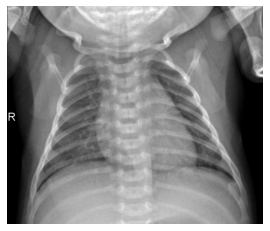

In [57]:
view_random_image(train_norm_path)

## Check single image

In [7]:
#load a single image from the bacteria folder
path = r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train\PNEUMONIA'

def load_image(path):
    for img in os.listdir(path):
        print('Image name =',img)
        image = cv.imread(os.path.join(path, img))
        break
        
    return image

Image name = IM-0115-0001.jpeg


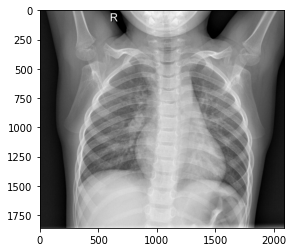

In [63]:
os.listdir(train_norm_path)[0]
image = load_image(train_norm_path)
plt.imshow(image,cmap='gray')
#cv.imread(os.path.join(path, os.listdir(path)[0]))

In [14]:
os.listdir(path)[0]

'person1000_bacteria_2931.jpeg'

Image name = person1000_bacteria_2931.jpeg


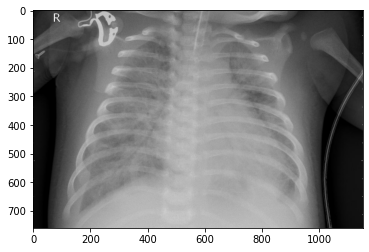

In [17]:
image = load_image(path)
plt.imshow(image,cmap='gray')
#cv.imread(os.path.join(path, os.listdir(path)[0]))

Image name = person1000_bacteria_2931.jpeg
The dimensions are 760 pixels height and 1152 pixels width
The maximum pixel value is 255.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 114.5373
The standard deviation is 56.2341


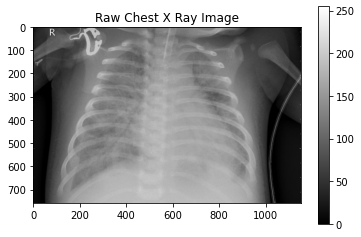

In [9]:
#path = r'C:\Users\Utilizador\Desktop\Projectos Data Sciene\Ironhack\Final_Project_3\chest_xray\train\PNEUMONIA\'

image = load_image(path)

#print('Image name =',img)
#image = cv.imread(os.path.join(path, img))

plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
print(f"The mean value of the pixels is {image.mean():.4f}")
print(f"The standard deviation is {image.std():.4f}")

In [ ]:
# Investigate a single image

bacteria_path = 'H:/All Files/Kaggle/chest_xray/train/2_BACTERIA/'

image = load_image(bacteria_path)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
print(f"The mean value of the pixels is {image.mean():.4f}")
print(f"The standard deviation is {image.std():.4f}")

In [ ]:
base_dir = 'chest_xray/reduced size/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

train_NORMAL_dir = os.path.join(train_dir, 'NORMAL')
train_PNEUMONIA_dir = os.path.join(train_dir, 'PNEUMONIA')

validation_NORMAL_dir = os.path.join(validation_dir, 'NORMAL')
validation_PNEUMONIA_dir = os.path.join(validation_dir, 'PNEUMONIA')

train_NORMAL_fnames = os.listdir( train_NORMAL_dir )
train_PNEUMONIA_fnames = os.listdir( train_PNEUMONIA_dir )

print(train_NORMAL_fnames[:10])
print(train_PNEUMONIA_fnames[:10])

print('total training NORMAL images :', len(os.listdir(      train_cats_dir ) ))
print('total training PNEUMONIA images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation NORMAL images :', len(os.listdir( validation_cats_dir ) ))
print('total validation PNEUMONIA images :', len(os.listdir( validation_dogs_dir ) ))